In [1]:
import pandas as pd
import numpy as np

In [2]:
syn_df= pd.read_csv('/content/drive/MyDrive/bank churn/Churn_Modelling.csv')
original_df = pd.read_csv('/content/drive/MyDrive/bank churn/train.csv')

In [6]:
df = pd.concat([syn_df, original_df], axis = 0)

In [9]:
df.drop(columns = ['RowNumber', 'CustomerId','Surname', 'Geography', 'id'], inplace = True)

In [10]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,608.0,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,699.0,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,850.0,Female,43.0,2.0,125510.82,1.0,NaN,1.0,79084.10,0.0
...,...,...,...,...,...,...,...,...,...,...
14995,602.0,Female,31.0,2.0,0.00,2.0,1.0,0.0,122433.09,0.0
14996,731.0,Female,44.0,4.0,0.00,2.0,1.0,0.0,112973.22,0.0
14997,705.0,Female,39.0,2.0,129118.50,1.0,1.0,1.0,87985.20,0.0
14998,648.0,Female,45.0,1.0,107868.14,1.0,1.0,0.0,141148.21,1.0


In [23]:
df['Gender'] = df.apply(lambda x : 1 if (x['Gender'] == "Female") else 0, axis = 1)

In [24]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,1,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,608.0,1,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,1,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,699.0,1,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,850.0,1,43.0,2.0,125510.82,1.0,NaN,1.0,79084.10,0.0
...,...,...,...,...,...,...,...,...,...,...
14995,602.0,1,31.0,2.0,0.00,2.0,1.0,0.0,122433.09,0.0
14996,731.0,1,44.0,4.0,0.00,2.0,1.0,0.0,112973.22,0.0
14997,705.0,1,39.0,2.0,129118.50,1.0,1.0,1.0,87985.20,0.0
14998,648.0,1,45.0,1.0,107868.14,1.0,1.0,0.0,141148.21,1.0


In [25]:
def age_tr(df) :
    df['Age_Category'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '30-40', '40-50', '50-60', '60+'])
    return df

df = age_tr(df)

In [26]:
def cred_score_tr(df) :
    df['Credit_Score_Range'] = pd.cut(df['CreditScore'], bins=[0, 300, 600, 700, 800, 900], labels=['0-300', '300-600', '600-700', '700-800', '900+'])
    return df
df = cred_score_tr(df)

In [27]:
def acc_sal_tr(df):

    df['Balance_Salary_Ratio'] = df['Balance'] / df['EstimatedSalary']
    return df

df = acc_sal_tr(df)

In [37]:
def total_pr_tr(df) :
    df['Total_Products_Used'] = df['NumOfProducts'] + df['HasCrCard']
    return df

df = total_pr_tr(df)

In [42]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Category,Credit_Score_Range,Balance_Salary_Ratio,Total_Products_Used
0,619.0,1,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,40-50,600-700,0.000000,2.0
1,608.0,1,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,40-50,600-700,0.744677,1.0
2,502.0,1,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,40-50,300-600,1.401375,4.0
3,699.0,1,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,30-40,600-700,0.000000,2.0
4,850.0,1,43.0,2.0,125510.82,1.0,NaN,1.0,79084.10,0.0,40-50,900+,1.587055,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,602.0,1,31.0,2.0,0.00,2.0,1.0,0.0,122433.09,0.0,30-40,600-700,0.000000,3.0
14996,731.0,1,44.0,4.0,0.00,2.0,1.0,0.0,112973.22,0.0,40-50,700-800,0.000000,3.0
14997,705.0,1,39.0,2.0,129118.50,1.0,1.0,1.0,87985.20,0.0,30-40,700-800,1.467502,2.0
14998,648.0,1,45.0,1.0,107868.14,1.0,1.0,0.0,141148.21,1.0,40-50,600-700,0.764219,2.0


In [43]:
scale_cols = ['CreditScore', 'Balance', 'NumOfProducts',
       'HasCrCard', 'EstimatedSalary',  'Balance_Salary_Ratio',
       'Total_Products_Used']

label_cols = ['Gender', 'Age','Tenure','IsActiveMember', 'Exited',
       'Age_Category', 'Credit_Score_Range', ]

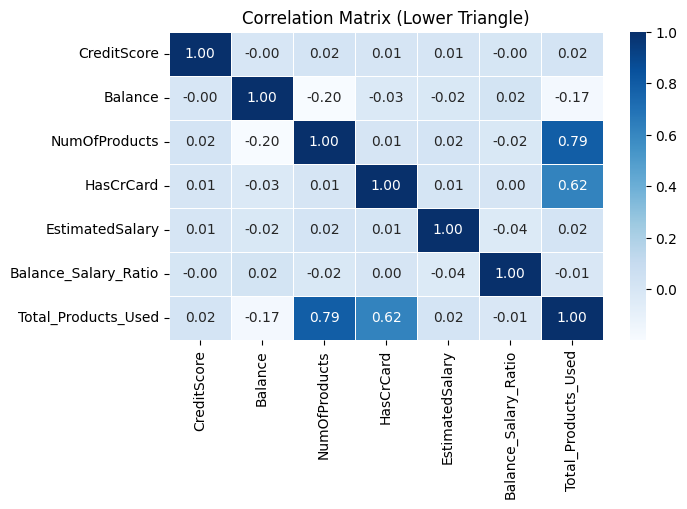

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[scale_cols].corr()

# Create a heatmap with masked upper triangle
plt.figure(figsize=(7,4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix (Lower Triangle)')
plt.show()

In [47]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
sc = StandardScaler()

# Assuming train_to_scale and test_to_scale are your DataFrames
scaled_df = pd.DataFrame(sc.fit_transform(df[scale_cols]), columns=scale_cols)

In [49]:
for i in label_cols:
  encoder = LabelEncoder()
  df[i] = encoder.fit_transform(df[i])

In [51]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Age_Category', 'Credit_Score_Range', 'Balance_Salary_Ratio',
       'Total_Products_Used'],
      dtype='object')

In [58]:
df.dropna(inplace = True)

In [73]:
df = df.reset_index().drop(columns = ['index'])

In [74]:
X = df.drop(columns = ['NumOfProducts', 'HasCrCard', 'Exited'])
y = df['Exited']

In [75]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import  confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

In [76]:
X.shape, y.shape

((25001, 11), (25001,))

In [ ]:
from sklearn.metrics import roc_auc_score


#XGBoost parameters
xgb_params = {'max_depth': 8,
 'min_child_weight': 9,
 'learning_rate': 0.015784217705381666,
 'n_estimators': 928,
 'subsample': 0.8311128887439883,
 'colsample_bytree': 0.3454344427319984,
 'random_state': 42}



# number of folds
n_splits = 10

#  StratifiedKFold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

#  cross-validation results
cv_results = []

# stratified k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]


    # XGBoost model
    xgb_model = XGBClassifier(**xgb_params )

    xgb_model.fit(X_train, y_train )

    # predictions on the validation set
    y_val_pred_prob = xgb_model.predict(X_val)
    y_pred = xgb_model.predict(X_val)

    f1=  f1_score(y_val, y_pred, average='weighted')

    # Evaluating the model

    roc_auc = roc_auc_score(y_val, y_val_pred_prob)
    print(f'Fold {fold + 1}, AUC Score on Validation Set: {roc_auc}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print('-'*70)

    # results
    cv_results.append(roc_auc)

# average cross-validation result
average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage AUC-score across {n_splits} folds: {average_cv_result}')


In [ ]:
from catboost import CatBoostClassifier
catboost_params = {
    'iterations': 848,
    'depth': 28,
    'min_data_in_leaf': 5,
    'learning_rate': 0.027876808218320774,
    'grow_policy': 'Lossguide',
    'bootstrap_type': 'Bernoulli',
    'eval_metric': 'AUC',
}

n_splits = 10

stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


cv_results = []


for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    cat_model = CatBoostClassifier(**catboost_params,
                            random_state=42, verbose =0
                           )
    cat_model.fit(X_train,y_train)

    y_val_pred_prob = cat_model.predict_proba(X_val)
    y_pred = cat_model.predict(X_val)

    f1=  f1_score(y_val, y_pred, average='weighted')

    # Evaluating the model
    logloss = log_loss(y_val, y_val_pred_prob)
    roc_auc = roc_auc_score(y_val, y_pred)
    print(f'Fold {fold + 1}, AUC- score on Validation Set: {roc_auc}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print('-'*70)


    cv_results.append(logloss)

average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage Logarithmic Loss across {n_splits} folds: {average_cv_result}')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [87]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators = [('xgb', xgb_model), ('CB', cat_model)],
                            voting='soft'
                            )
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.3454344427319984,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.015784217705381666,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=8,
                                            max_leaves=None, min_child_weight=9,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=928, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('CB',
                              <catboost.core.CatBoostClassifier object at 0x7a25b9067400>)],
                 voting='soft')

In [88]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print(classification_report(Ensemble.predict(X_test), y_test))